In [10]:
my_list = [8, 6, 4, 2]
my_list.pop(1)
print my_list

[8, 4, 2]


## <center>EDA of Billboard Top 100</center>



In [1]:
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
billboard = pd.read_csv('/Users/smoot/Desktop/ga/DSI_SM_01/curriculum/week-02/2.4-lab/assets/datasets/billboard.csv')
df = billboard.copy()

In [236]:
df.info()

In [235]:
df.shape

In [234]:
df.index

In [311]:
# Show the name of each column:
df.columns

In [309]:
#Show the last 10 rows of the table
df.tail()

In [4]:
#Show a summary of the  statistics.
df.describe()

,year,x1st.week,x2nd.week,x3rd.week,x4th.week,x5th.week,x6th.week,x7th.week,x8th.week,x9th.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
count,317.0,317.000000,312.000000,307.000000,300.000000,292.000000,280.000000,269.000000,260.000000,253.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2000.0,79.958991,71.173077,65.045603,59.763333,56.339041,52.360714,49.219331,47.119231,46.343874,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,14.686865,18.200443,20.752302,22.324619,23.780022,24.473273,25.654279,26.370782,27.136419,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2000.0,15.000000,8.000000,6.000000,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2000.0,74.000000,63.000000,53.000000,44.750000,38.750000,33.750000,30.000000,27.000000,26.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2000.0,81.000000,73.000000,66.000000,61.000000,57.000000,51.500000,47.000000,45.500000,42.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2000.0,91.000000,84.000000,79.000000,76.000000,73.250000,72.250000,67.000000,67.000000,67.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2000.0,100.000000,100.000000,100.000000,100.000000,100.000000,99.000000,100.000000,99.000000,100.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [518]:
#There are other ways of calculating these descriptive statistics while exploring your data.
np.std(df)
np.var(df)
np.mean(df)

In [ ]:
df.axes

In [3]:
df.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Write a brief description of your data, and any interesting observations you've made thus far. 

## Step 2: Clean your data.

##### Do some rudimentary cleaning. Rename any columns that are poorly named, shorten any strings that may be too long, fill in any missing values. Explain your rationale for the way you choose to "impute" the missing data.

In [4]:
df.rename(columns = {'year' : 'Year', 'track' : 'Track', 'time' : 'track_length', 'genre' : 'Genre',
                     'artist.inverted' : 'Artist'}, inplace = True)
# df.columns = df.columns.str.replace('.', '_')
df.columns = df.columns.str.replace('x', '.', '', n=-1)
df

TypeError: replace() got multiple values for keyword argument 'n'

In [24]:
df.drop(df.columns[72:], axis = 1, inplace = True)
df['date_entered'] = pd.to_datetime(df['date_entered'])
df['date_peaked'] = pd.to_datetime(df['date_peaked'])
df['days_to_peak'] = df['date_peaked'] - df['date_entered']
df['days_to_peak'] 
df['Artist'][22] = '98˚'
df['Artist'][15] = 'Matchbox Twenty'
df['1st_week'] = df['1st_week'].astype(float)
df['Year'] = df['Year'].astype(str)
# df['raw_score'] = df.sum(axis = 1, numeric_only = True).astype(int) 
# df['raw_avg'] = df.mean(axis = 1, numeric_only = True).astype(int)
df['peak_rank'] = df.min(axis = 1, numeric_only = True).astype(int)
df['debut_rank'] = df['1st_week'].astype(int)
df.head(1)

/Users/smoot/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/smoot/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Year,Artist,Track,track_length,Genre,date_entered,date_peaked,1st_week,2nd_week,3rd_week,...,59th_week,60th_week,61st_week,62nd_week,63rd_week,64th_week,65th_week,days_to_peak,peak_rank,debut_rank
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78.0,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56 days,1,78


##### Using Pandas' built in `melt` function, pivot the weekly ranking data to be long rather than wide. As a result, you will have removed the 72 'week' columns and replace it with two: Week and Ranking. There will now be multiple entries for each song, one for each week on the Billboard rankings.

In [25]:
pd.melt(df, id_vars=['Artist', 'Track', 'Year', 'track_length', 'Genre', 'date_entered',
                    'date_peaked', 'days_to_peak'], var_name = 'Week', value_name = 'Ranking')


,Artist,Track,Year,track_length,Genre,date_entered,date_peaked,days_to_peak,Week,Ranking
0,Destiny's Child,Independent Women Part I,2000,3:38,Rock,2000-09-23,2000-11-18,56 days,1st_week,78.0
1,Santana,"Maria, Maria",2000,4:18,Rock,2000-02-12,2000-04-08,56 days,1st_week,15.0
2,Savage Garden,I Knew I Loved You,2000,4:07,Rock,1999-10-23,2000-01-29,98 days,1st_week,71.0
3,Madonna,Music,2000,3:45,Rock,2000-08-12,2000-09-16,35 days,1st_week,41.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),2000,3:38,Rock,2000-08-05,2000-10-14,70 days,1st_week,57.0
5,Janet,Doesn't Really Matter,2000,4:17,Rock,2000-06-17,2000-08-26,70 days,1st_week,59.0
6,Destiny's Child,Say My Name,2000,4:31,Rock,1999-12-25,2000-03-18,84 days,1st_week,83.0
7,"Iglesias, Enrique",Be With You,2000,3:36,Latin,2000-04-01,2000-06-24,84 days,1st_week,63.0
8,Sisqo,Incomplete,2000,3:52,Rock,2000-06-24,2000-08-12,49 days,1st_week,77.0
9,Lonestar,Amazed,2000,4:25,Country,1999-06-05,2000-03-04,273 days,1st_week,81.0


## Step 3: Visualize your data.

##### Using a plotting utility of your choice (Tableau or python modules or both), create visualizations that will provide context to your data. There is no minimum or maximum number of graphs you should generate, but there should be a clear and consistent story being told. Give insights to the distribution, statistics, and relationships of the data. 

In [485]:
from ggplot import * 
# export to csv
df.to_csv('r_smoot_project2_billboard.csv', float_format=str)

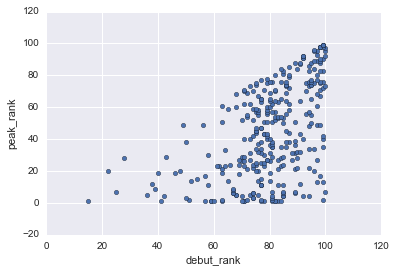

In [36]:
df.plot.scatter(y = 'peak_rank', x = 'debut_rank')

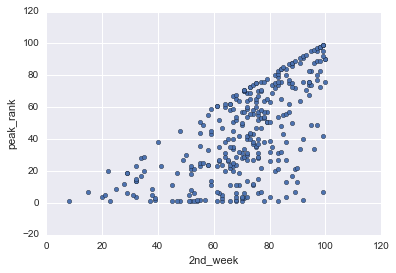

In [37]:
df.plot.scatter(y = 'peak_rank', x = '2nd_week')

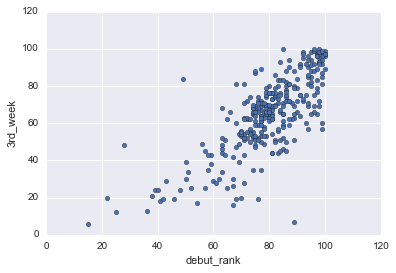

In [44]:
df.plot.scatter(y = '3rd_week', x = 'debut_rank')
df.plot

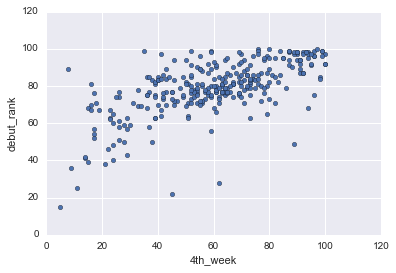

In [46]:
df.plot.scatter(x = '4th_week', y = 'debut_rank')

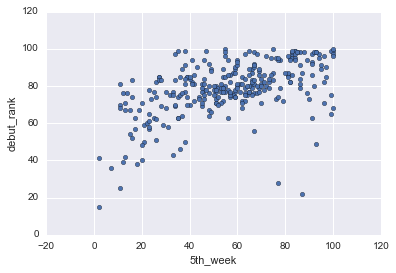

In [47]:
df.plot.scatter(x = '5th_week', y = 'debut_rank')

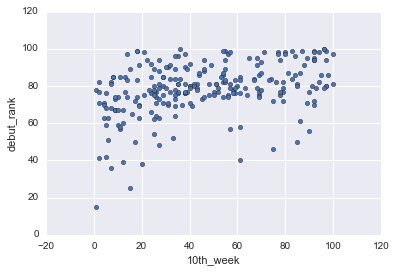

In [48]:
df.plot.scatter(x = '10th_week', y = 'debut_rank')

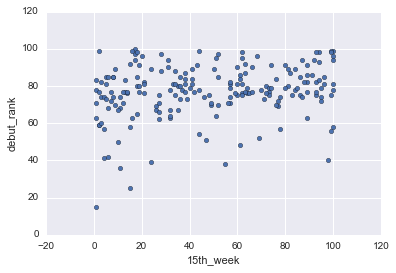

In [53]:
df.plot.scatter(x = '15th_week', y = 'debut_rank')

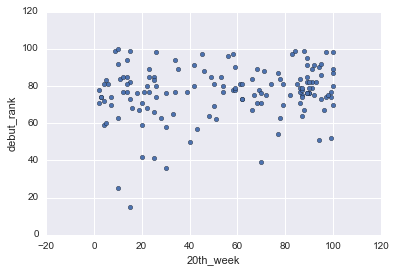

In [49]:
df.plot.scatter(x = '20th_week', y = 'debut_rank')

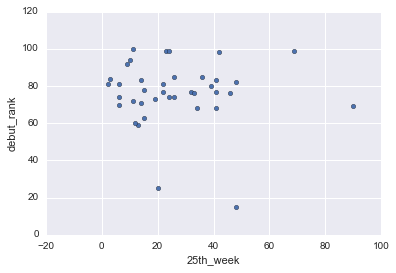

In [52]:
df.plot.scatter(x = '25th_week', y = 'debut_rank')

In [39]:
pd.pivot_table(df, index = ['Artist', "Track"], columns = ['Year'], margins = True)

1st_week  \
Year                                                                          2000   
Artist               Track                                                           
2 Pac                Baby Don't Cry (Keep Ya Head Up II)                 87.000000   
2Ge+her              The Hardest Part Of Breaking Up (Is Getting Bac...  91.000000   
3 Doors Down         Kryptonite                                          81.000000   
                     Loser                                               76.000000   
504 Boyz             Wobble Wobble                                       57.000000   
98˚                  Give Me Just One Night (Una Noche)                  51.000000   
A*Teens              Dancing Queen                                       97.000000   
Aaliyah              I Don't Wanna                                       84.000000   
                     Try Again                                           59.000000   
Adams, Yolanda       Open My Heart                                       76.000000   
Adkins, Trace        More                                                84.000000   
Aguilera, Christina  Come On Over Baby (All I Want Is You)               57.000000   
                     I Turn To You                                       50.000000   
                     What A Girl Wants                                   71.000000   
Alice Deejay         Better Off Alone                                    79.000000   
Allan, Gary          Smoke Rings In The Dark                             80.000000   
Amber                Sexual (Li Da Di)                                   99.000000   
Anastacia            I'm Outta Love                                      92.000000   
Anthony, Marc        My Baby You                                         82.000000   
                     You Sang To Me                                      77.000000   
Avant                My First Love                                       70.000000   
                     Separated                                           62.000000   
BBMak                Back Here                                           99.000000   
Backstreet Boys, The Shape Of My Heart                                   39.000000   
                     Show Me The Meaning Of Being Lonely                 74.000000   
                     The One                                             58.000000   
Badu, Erkyah         Bag Lady                                            67.000000   
Baha Men             Who Let The Dogs Out                                99.000000   
Barenaked Ladies     Pinch Me                                            77.000000   
Beenie Man           Girls Dem Sugar                                     72.000000   
...                                                                            ...   
Thomas, Carl         Emotional                                           77.000000   
                     I Wish                                              75.000000   
                     Summer Rain                                         82.000000   
Tippin, Aaron        Kiss This                                           74.000000   
Train                Meet Virginia                                       76.000000   
Trick Daddy          Shut Up                                             99.000000   
Trina                Pull Over                                           97.000000   
Tritt, Travis        Best Of Intentions                                  97.000000   
Tuesday              I Know                                              98.000000   
Urban, Keith         Your Everything                                     81.000000   
Usher                Pop Ya Collar                                       68.000000   
Vassar, Phil         Carlene                                             75.000000   
                     Just Another Day In Paradise                        81.000000   
Vertical Horizon     Everything 